In [85]:
# !pip install pandasql

In [86]:
import pandas as pd
import sqlite3
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
# import pandasql as psql

In [87]:
from statsmodels.formula.api import ols

In [88]:
# # Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [89]:
save_path = f"{os.getcwd()}/visualizations/"
save_path

'/home/jovyan/work/notebooks/visualizations/'

In [129]:
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def save_histograms(dataframe, save_path, metric):
    start_time = time.time()
    
    # Filter the dataframe to include only numeric columns
    numeric_columns = dataframe.select_dtypes(include=['number'])
    
    # Check if the specific column is present in the dataframe
    if metric not in numeric_columns.columns or 'Charter Funding Type' not in dataframe.columns:
        print('Required columns are not present in the dataframe.')
        return
    
    # Create the directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    # Group by 'Charter Funding Type' and plot histograms for 'Enrollment (K-12)'
    for funding_type, group in dataframe.groupby('Charter Funding Type'):
        plt.figure(figsize=(8, 6))
        
        sns.histplot(group[metric], kde=True, color='blue', bins=20)
        plt.title(f'Histogram with KDE of {metric}\nCharter Funding Type: {funding_type}')
        plt.xlabel(metric)
        plt.ylabel('Density')
        
        # Calculate the number of events (N) and format it with thousands separators
        num_events = len(group[metric])
        formatted_num_events = '{:,}'.format(num_events)
        
        # Add annotation for N in the top-middle part of the histogram
        plt.text(0.5, 0.95, f'N={formatted_num_events}', fontsize=12, ha='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7))
        
        # Save the histogram as a .jpg file with the column name and funding type
        file_name = f'{metric}_{funding_type}.jpg'
        file_path = os.path.join(save_path, file_name)
        plt.savefig(file_path)
        
        print(f'Saved: {file_name}')
        
        plt.close()  # Close the plot to avoid displaying in the notebook

        # Print time elapsed for each whole minute
        elapsed_time = time.time() - start_time
        if int(elapsed_time) % 60 == 0 or num_events == len(group[metric]) - 1:
            print(f'Time elapsed: {int(elapsed_time / 60)} minutes')

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your dataframe
# save_histograms(df, 'path_to_save_directory')


In [90]:
def execute_query(db_path, query):
    try:
        conn = sqlite3.connect(db_path)
        df = pd.read_sql_query(query, conn)
        return df
        
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
        return None
        
    finally:
        if conn:
            conn.close()

In [91]:
# Example usage to list all tables
db_path = f"{os.getcwd()}/tmp/cdeschools.sqlite"
query = "SELECT name FROM sqlite_master WHERE type='table';"
df_tables = execute_query(db_path, query)

if df_tables is not None:
    print("Tables in the database:")
    print(df_tables)


Tables in the database:
        name
0    schools
1       frpm
2  satscores


In [92]:
query = """
SELECT
  strftime('%Y',LastUpdate) AS year
 ,COUNT(LastUpdate) as dates_cnt
FROM (
    SELECT
      LastUpdate
    FROM
      schools
)
GROUP BY
  strftime('%Y',LastUpdate)
ORDER BY
  year DESC
"""
LastUpdate = execute_query(db_path, query)

In [93]:
LastUpdate

,year,dates_cnt
0,2016,4849
1,2015,7283
2,2014,182
3,2013,714
4,2012,26
5,2011,29
6,2010,41
7,2009,907
8,2008,17
9,2007,7


In [94]:
query = """
SELECT
  strftime('%Y',OpenDate) AS year
 ,COUNT(OpenDate) as dates_cnt
FROM (
    SELECT
      OpenDate
    FROM
      schools
)
GROUP BY
  strftime('%Y',OpenDate)
ORDER BY
  year DESC
"""
OpenDate = execute_query(db_path, query)

In [95]:
OpenDate

,year,dates_cnt
0,2017,6
1,2016,103
2,2015,148
3,2014,159
4,2013,164
...,...,...
112,1860,1
113,1856,1
114,1853,1
115,1850,1


In [96]:
query = """
SELECT
  strftime('%Y',ClosedDate) AS year
 ,COUNT(ClosedDate) as dates_cnt
FROM (
    SELECT
      ClosedDate
    FROM
      schools
)
GROUP BY
  strftime('%Y',ClosedDate)
ORDER BY
  year DESC
"""
ClosedDate = execute_query(db_path, query)

In [97]:
ClosedDate

,year,dates_cnt
0,2016,128
1,2015,134
2,2014,114
3,2013,172
4,2012,130
5,2011,144
6,2010,175
7,2009,175
8,2008,116
9,2007,118


In [98]:
query = """

    SELECT
       schools.CDSCodE
      ,schools.NCESDist
      ,schools.NCESSchool
      ,schools.StatusType
      ,schools.County
      ,schools.District
      ,schools.School
      ,schools.Street
      ,schools.City
      ,schools.Zip
      ,schools.State
      ,schools.FundingType
      ,schools.DOC
      ,schools.DOCType
      ,schools.SOC
      ,schools.SOCType
      ,schools.EdOpsCode
      ,schools.EdOpsName
      ,schools.EILCode
      ,schools.EILName
      ,schools.GSoffered
      ,schools.GSserved
      ,schools.LastUpdate
      ,schools.OpenDate
      ,schools.ClosedDate
    FROM
      schools
    WHERE
      OpenDate IS NOT NULL
       AND
      ClosedDate IS NULL
    ORDER BY
     LastUpdate
"""
df = execute_query(db_path, query)

In [99]:
df

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,City,Zip,State,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,LastUpdate,OpenDate,ClosedDate
0,09743770990010,0600096,10770,Active,El Dorado,Central Sierra ROP,Central Sierra ROP,6767 Green Valley Road,Placerville,95667-9357,CA,None,98,Regional Occupation Center/Program (ROC/P),98,ROC/ROP,None,None,HS,High School,10-12,None,2013-07-02,1980-07-01,None
1,19744271995075,0600108,10921,Active,Los Angeles,Long Beach Unified ROP,Long Beach Unified School District ROP,3701B East Willow Street,Long Beach,90815-1732,CA,None,98,Regional Occupation Center/Program (ROC/P),98,ROC/ROP,None,None,HS,High School,10-12,None,2013-07-02,1980-07-01,None
2,19744431995091,0600110,10923,Active,Los Angeles,Los Angeles County ROP,Los Angeles County ROP,"9300 Imperial Highway, Clark Building",Downey,90242-2890,CA,None,98,Regional Occupation Center/Program (ROC/P),98,ROC/ROP,None,None,HS,High School,9-12,None,2013-07-02,1980-07-01,None
3,19747991995133,0600112,10925,Active,Los Angeles,Antelope Valley ROP,Antelope Valley ROP,1156 East Avenue S,Palmdale,93550-6149,CA,None,98,Regional Occupation Center/Program (ROC/P),98,ROC/ROP,None,None,HS,High School,9-12,None,2013-07-02,1980-07-01,None
4,24744762490019,0600119,10964,Active,Merced,Merced County ROP,Merced County ROP,632 West 13th Street,Merced,95341-5908,CA,None,98,Regional Occupation Center/Program (ROC/P),98,ROC/ROP,None,None,HS,High School,11-12,None,2013-07-02,1980-07-01,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,19648576108609,0629580,09606,Active,Los Angeles,Palmdale Elementary,Buena Vista Elementary,37005 Hillcrest Drive,Palmdale,93552-5347,CA,None,52,Elementary School District,60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,2016-10-12,1980-07-01,None
10619,19768690131318,0601428,13813,Active,Los Angeles,Wiseburn Unified,Malaga Cove School - Success Learning Center,300 Paseo Del Mar,Palos Verdes Estates,90274-1272,CA,None,54,Unified School District,09,Special Education Schools (Public),SPEC,Special Education School,ELEMHIGH,Elementary-High Combination,K-12,None,2016-10-12,2014-08-25,None
10620,33671730119297,0629550,12602,Active,Riverside,Palm Springs Unified,Virtual Pre,980 East Tahquitz Canyon Drive,Palm Springs,92262-6708,CA,None,54,Unified School District,08,Preschool,TRAD,Traditional,PS,Preschool,P,None,2016-10-12,2009-04-01,None
10621,44698490126920,0637290,13055,Active,Santa Cruz,Soquel Union Elementary,Opal Cliffs,4510 Jade Street,Capitola,95010-3957,CA,None,52,Elementary School District,60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,P-5,K,2016-10-12,2012-08-29,None


In [100]:
query = """
WITH

school AS (
    SELECT
       schools.CDSCodE
      ,schools.NCESDist
      ,schools.NCESSchool
      ,schools.StatusType
      ,schools.County
      ,schools.District
      ,schools.School
      ,schools.Street
      ,schools.City
      ,schools.Zip
      ,schools.State
      ,schools.FundingType
      ,schools.DOC
      ,schools.DOCType
      ,schools.SOC
      ,schools.SOCType
      ,schools.EdOpsCode
      ,schools.EdOpsName
      ,schools.EILCode
      ,schools.EILName
      ,schools.GSoffered
      ,schools.GSserved
      ,schools.LastUpdate
      ,schools.OpenDate
      ,schools.ClosedDate
    FROM
      schools
    WHERE
      OpenDate IS NOT NULL
       AND
      ClosedDate IS NULL
),

scores AS (
    SELECT
       cds
      ,rtype
      --,sname
      --,dname
      --,cname
      ,enroll12
      ,NumTstTakr
      ,AvgScrRead
      ,AvgScrMath
      ,AvgScrWrite
      ,NumGE1500
      ,PctGE1500
    FROM
      satscores
    WHERE
      cds in (
          SELECT
            DISTINCT CDSCode
          FROM
            schools
          WHERE
            OpenDate IS NOT NULL
             AND
            ClosedDate IS NULL
    )
)

SELECT
  school.*
 ,scores.*
FROM school
INNER JOIN scores
ON school.CDSCodE = scores.cds
"""
df = execute_query(db_path, query)

In [101]:
df

,CDSCodE,NCESDist,NCESSchool,StatusType,County,District,School,Street,City,Zip,State,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,LastUpdate,OpenDate,ClosedDate,cds,rtype,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrite,NumGE1500,PctGE1500
0,01100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,Oakland,94612-3355,CA,Directly funded,00,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,2006-08-28,None,01100170112607,S,75,71,397.0,387.0,395.0,5.0,7.04
1,01611190106401,0601770,10547,Active,Alameda,Alameda Unified,Alameda Science and Technology Institute,555 Atlantic Avenue,Alameda,94501-2109,CA,None,54,Unified School District,63,Alternative Schools of Choice,ALTSOC,Alternative School of Choice,HS,High School,9-12,9-12,2015-06-18,2004-08-19,None,01611190106401,S,36,36,562.0,590.0,555.0,29.0,80.56
2,01611190119222,0601770,12399,Active,Alameda,Alameda Unified,Nea Community Learning Center,1900 Third Street,Alameda,94501-1851,CA,Directly funded,54,Unified School District,65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,K-12,K-12,2015-09-11,2009-08-31,None,01611190119222,S,12,6,NaN,NaN,NaN,NaN,NaN
3,01611190130229,0601770,00041,Active,Alameda,Alameda Unified,Alameda High,2201 Encinal Avenue,Alameda,94501-4406,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,1980-07-01,None,01611190130229,S,465,325,543.0,573.0,543.0,229.0,70.46
4,01611190130609,0601770,08673,Active,Alameda,Alameda Unified,Alameda Community Learning Center,1900 Third Street,Alameda,94501-1851,CA,Directly funded,54,Unified School District,65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,2016-04-19,2001-08-30,None,01611190130609,S,26,20,575.0,593.0,581.0,16.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,58727286115935,0607260,08436,Active,Yuba,Camptonville Elementary,Camptonville Academy,321 16th Street,Marysville,95901-5122,CA,Directly funded,52,Elementary School District,65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,K-12,K-12,2016-08-19,1998-10-16,None,58727286115935,S,34,10,NaN,NaN,NaN,NaN,NaN
1706,58727365830013,0624090,03630,Active,Yuba,Marysville Joint Unified,Lindhurst High,4446 Olive Drive,Olivehurst,95961-4738,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2016-07-27,1980-07-01,None,58727365830013,S,221,65,428.0,450.0,423.0,13.0,20.00
1707,58727365830138,0624090,08671,Active,Yuba,Marysville Joint Unified,Marysville Charter Academy for the Arts,1917 B Street,Marysville,95901-3731,CA,Locally funded,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,7-12,7-12,2015-06-18,2000-08-28,None,58727365830138,S,41,29,501.0,494.0,484.0,16.0,55.17
1708,58727365835202,0624090,03633,Active,Yuba,Marysville Joint Unified,Marysville High,12 East 18th Street,Marysville,95901-3751,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,1980-07-01,None,58727365835202,S,197,53,489.0,513.0,487.0,24.0,45.28


###	Q1: What are the 10 best high schools for maths scores?

In [102]:
high_school = ['9-12', '10-12', '8-12', '12', '9-Adult']
elementary = ['K-12', '2-12', '1-12', '5-12']

In [103]:
query = """
WITH

school AS (
    SELECT
       schools.CDSCodE
      ,schools.NCESDist
      ,schools.NCESSchool
      ,schools.StatusType
      ,schools.County
      ,schools.District
      ,schools.School
      ,schools.Street
      ,schools.City
      ,schools.Zip
      ,schools.State
      ,schools.FundingType
      ,schools.DOC
      ,schools.DOCType
      ,schools.SOC
      ,schools.SOCType
      ,schools.EdOpsCode
      ,schools.EdOpsName
      ,schools.EILCode
      ,schools.EILName
      ,schools.GSoffered
      ,schools.GSserved
      ,schools.LastUpdate
      ,schools.OpenDate
      ,schools.ClosedDate
    FROM
      schools
    WHERE
      OpenDate IS NOT NULL
       AND
      ClosedDate IS NULL
),

scores AS (
    SELECT
       cds
      ,rtype
      --,sname
      --,dname
      --,cname
      ,enroll12
      ,NumTstTakr
      ,AvgScrRead
      ,AvgScrMath
      ,AvgScrWrite
      ,NumGE1500
      ,PctGE1500
    FROM
      satscores
    WHERE
      cds in (
          SELECT
            DISTINCT CDSCode
          FROM
            schools
          WHERE
            OpenDate IS NOT NULL
             AND
            ClosedDate IS NULL
    )
)

SELECT
  school.*
 ,scores.*
FROM school
INNER JOIN scores
ON school.CDSCodE = scores.cds
WHERE
 GSserved IN (
     '9-12'
     ,'10-12'
     ,'8-12'
     ,'12'
     ,'9-Adult'
 )
ORDER BY
 AvgScrMath DESC
"""
df = execute_query(db_path, query)

In [104]:
df.head(10)

,CDSCodE,NCESDist,NCESSchool,StatusType,County,District,School,Street,City,Zip,State,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,LastUpdate,OpenDate,ClosedDate,cds,rtype,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrite,NumGE1500,PctGE1500
0,01611760135244,0614400,01678,Active,Alameda,Fremont Unified,Mission San Jose High,41717 Palm Avenue,Fremont,94539-4799,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-07-09,1980-07-01,None,01611760135244,S,518,453,653.0,699.0,671.0,421.0,92.94
1,43694684334421,0614430,01698,Active,Santa Clara,Fremont Union High,Lynbrook High,1280 Johnson Avenue,San Jose,95129-4172,CA,None,56,High School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2016-04-20,1980-07-01,None,43694684334421,S,472,398,639.0,698.0,664.0,382.0,95.98
2,43694684334462,0614430,01699,Active,Santa Clara,Fremont Union High,Monta Vista High,21840 McClellan Road,Cupertino,95014-4055,CA,None,56,High School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,1980-07-01,None,43694684334462,S,608,513,638.0,691.0,657.0,487.0,94.93
3,43696414332904,0629610,04587,Active,Santa Clara,Palo Alto Unified,Henry M. Gunn High,780 Arastradero Road,Palo Alto,94306-3827,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,1980-07-01,None,43696414332904,S,447,330,642.0,686.0,646.0,310.0,93.94
4,43695344337762,0622800,03487,Active,Santa Clara,Los Gatos-Saratoga Joint Union High,Saratoga High,20300 Herriman Avenue,Saratoga,95070-4950,CA,None,56,High School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,1980-07-01,None,43695344337762,S,362,319,639.0,674.0,650.0,302.0,94.67
5,30736503035102,0684500,07067,Active,Orange,Irvine Unified,University High,4771 Campus Drive,Irvine,92612-3298,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-08-07,1980-07-01,None,30736503035102,S,648,392,617.0,666.0,624.0,355.0,90.56
6,43694684331799,0614430,01695,Active,Santa Clara,Fremont Union High,Cupertino High,10100 Finch Avenue,Cupertino,95014-3411,CA,None,56,High School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,1980-07-01,None,43694684331799,S,508,362,598.0,660.0,619.0,315.0,87.02
7,19649641937754,0634860,05886,Active,Los Angeles,San Marino Unified,San Marino High,2701 Huntington Drive,San Marino,91108-2295,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-12-17,1980-07-01,None,19649641937754,S,265,212,601.0,657.0,613.0,193.0,91.04
8,43696414335782,0629610,04596,Active,Santa Clara,Palo Alto Unified,Palo Alto High,50 Embarcadero Road,Palo Alto,94301-2321,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,1980-07-01,None,43696414335782,S,476,370,627.0,657.0,624.0,330.0,89.19
9,30736503030657,0684500,08251,Active,Orange,Irvine Unified,Northwood High,4515 Portola Parkway,Irvine,92620-2200,CA,None,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,2015-06-18,1999-09-01,None,30736503030657,S,537,358,604.0,656.0,621.0,329.0,91.90


In [105]:
df[[
    "AvgScrMath"
    ,"School"
    ,"District"
    ,"County"
    ,"City"
    ,"EdOpsName"
    ,"FundingType"
]].head(10)

,AvgScrMath,School,District,County,City,EdOpsName,FundingType
0,699.0,Mission San Jose High,Fremont Unified,Alameda,Fremont,Traditional,None
1,698.0,Lynbrook High,Fremont Union High,Santa Clara,San Jose,Traditional,None
2,691.0,Monta Vista High,Fremont Union High,Santa Clara,Cupertino,Traditional,None
3,686.0,Henry M. Gunn High,Palo Alto Unified,Santa Clara,Palo Alto,Traditional,None
4,674.0,Saratoga High,Los Gatos-Saratoga Joint Union High,Santa Clara,Saratoga,Traditional,None
5,666.0,University High,Irvine Unified,Orange,Irvine,Traditional,None
6,660.0,Cupertino High,Fremont Union High,Santa Clara,Cupertino,Traditional,None
7,657.0,San Marino High,San Marino Unified,Los Angeles,San Marino,Traditional,None
8,657.0,Palo Alto High,Palo Alto Unified,Santa Clara,Palo Alto,Traditional,None
9,656.0,Northwood High,Irvine Unified,Orange,Irvine,Traditional,None


###	Q2: Which counties don’t have any SAT scores?

In [106]:
query = """
WITH

school AS (
    SELECT
       --schools.CDSCodE
      --,schools.NCESDist
      --,schools.NCESSchool
      --,schools.StatusType
       schools.County
      ,schools.State
      --,schools.LastUpdate
      --,schools.OpenDate
      --,schools.ClosedDate
    FROM
      schools
    WHERE
      schools.OpenDate IS NOT NULL
       AND
      schools.ClosedDate IS NULL
       AND
      schools.CDSCodE NOT IN (
        SELECT DISTINCT
          satscores.cds
        FROM
          satscores
       )
)

SELECT
  DISTINCT
     State
    ,County
FROM school
"""
df = execute_query(db_path, query)

In [108]:
df

,State,County
0,CA,Alameda
1,CA,Alpine
2,CA,Amador
3,CA,Butte
4,CA,Calaveras
5,CA,Colusa
6,CA,Contra Costa
7,CA,Del Norte
8,CA,El Dorado
9,CA,Fresno


In [109]:
df["County"]

0             Alameda
1              Alpine
2              Amador
3               Butte
4           Calaveras
5              Colusa
6        Contra Costa
7           Del Norte
8           El Dorado
9              Fresno
10              Glenn
11           Humboldt
12           Imperial
13               Inyo
14               Kern
15              Kings
16               Lake
17             Lassen
18        Los Angeles
19             Madera
20              Marin
21           Mariposa
22          Mendocino
23             Merced
24              Modoc
25               Mono
26           Monterey
27               Napa
28             Nevada
29             Orange
30             Placer
31             Plumas
32          Riverside
33         Sacramento
34         San Benito
35     San Bernardino
36          San Diego
37      San Francisco
38        San Joaquin
39    San Luis Obispo
40          San Mateo
41      Santa Barbara
42        Santa Clara
43         Santa Cruz
44             Shasta
45        

### Q3: Are **locally funded** charter schools more likely than **directly funded** charter schools to enrol students on the FRPM (Free or Reduced-Price meals) program?

Age Breakdown for K-12 Students

Kindergarten (K): Typically ages 5-6

1st Grade: Typically ages 6-7

2nd Grade: Typically ages 7-8

3rd Grade: Typically ages 8-9

4th Grade: Typically ages 9-10

5th Grade: Typically ages 10-11

6th Grade: Typically ages 11-12

7th Grade: Typically ages 12-13

8th Grade: Typically ages 13-14

9th Grade (Freshman): Typically ages 14-15

10th Grade (Sophomore): Typically ages 15-16

11th Grade (Junior): Typically ages 16-17

12th Grade (Senior): Typically ages 17-18

Summary
Elementary School: Kindergarten through 5th grade, ages 5-11

Middle School: 6th grade through 8th grade, ages 11-14

High School: 9th grade through 12th grade, ages 14-18


In [140]:
query = """
WITH

meals AS (
    SELECT
        --"Academic Year"
        "School Code"
       ,"Charter Funding Type"
       --,"Low Grade"
       --,"High Grade"
       ,"Enrollment (K-12)"
       ,"FRPM Count (K-12)"
       --,"Percent (%) Eligible FRPM (K-12)"
       --,"FRPM Count (Ages 5-17)"
       --,"Percent (%) Eligible FRPM (Ages 5-17)"
       ,"Charter School (Y/N)"
    FROM
      frpm
    WHERE
      "Academic Year" IS NOT NULL
         AND
      "Charter Funding Type" IN (
          'Directly funded'
         ,'Locally funded'
      )
         AND
      "FRPM Count (K-12)" IS NOT NULL
)

SELECT
   meals.*
  ,"FRPM Count (K-12)" / "enrollment (K-12)" AS "FRPM/Enrollment Ratio"

FROM meals
"""
df = execute_query(db_path, query)

In [141]:
df

,School Code,Charter Funding Type,Enrollment (K-12),FRPM Count (K-12),Charter School (Y/N),FRPM/Enrollment Ratio
0,0109835,Directly funded,1087.0,715.0,1,0.657774
1,0112607,Directly funded,395.0,186.0,1,0.470886
2,0118489,Directly funded,244.0,175.0,1,0.717213
3,0123968,Directly funded,191.0,139.0,1,0.727749
4,0124172,Directly funded,257.0,21.0,1,0.081712
...,...,...,...,...,...,...
1171,5830112,Locally funded,263.0,117.0,1,0.444867
1172,6115935,Directly funded,431.0,236.0,1,0.547564
1173,0121632,Directly funded,154.0,111.0,1,0.720779
1174,5830138,Locally funded,374.0,179.0,1,0.478610


In [142]:
number = 10

for column in df.columns:
    print("Column name:", column)
    print("Data type:", df[column].dtype)
    print(f"First {number} unique values:", df[column].unique()[:number])
    print("Count of unique values:", df[column].nunique())
    print("Count of NULL values:", df[column].isnull().sum(), "\n")

Column name: School Code
Data type: object
First 10 unique values: ['0109835' '0112607' '0118489' '0123968' '0124172' '0125567' '6001788'
 '6002000' '0119222' '0122085']
Count of unique values: 1176
Count of NULL values: 0 

Column name: Charter Funding Type
Data type: object
First 10 unique values: ['Directly funded' 'Locally funded']
Count of unique values: 2
Count of NULL values: 0 

Column name: Enrollment (K-12)
Data type: float64
First 10 unique values: [1087.  395.  244.  191.  257.  279.  597.  437.  476.  508.]
Count of unique values: 651
Count of NULL values: 0 

Column name: FRPM Count (K-12)
Data type: float64
First 10 unique values: [715. 186. 175. 139.  21. 101. 557. 400. 147. 193.]
Count of unique values: 534
Count of NULL values: 0 

Column name: Charter School (Y/N)
Data type: int64
First 10 unique values: [1]
Count of unique values: 1
Count of NULL values: 0 

Column name: FRPM/Enrollment Ratio
Data type: float64
First 10 unique values: [0.65777369 0.47088608 0.717213

In [121]:
save_path

'/home/jovyan/work/notebooks/visualizations/'

In [130]:
save_histograms(df, f"{save_path}", metric="Enrollment (K-12)")

Saved: Enrollment (K-12)_Directly funded.jpg
Time elapsed: 0 minutes
Saved: Enrollment (K-12)_Locally funded.jpg
Time elapsed: 0 minutes


In [131]:
save_histograms(df, f"{save_path}", metric="FRPM Count (K-12)")

Saved: FRPM Count (K-12)_Directly funded.jpg
Time elapsed: 0 minutes
Saved: FRPM Count (K-12)_Locally funded.jpg
Time elapsed: 0 minutes


In [136]:
import pandas as pd
from scipy.stats import ks_2samp, mannwhitneyu

def test_equality_of_distributions(dataframe, metric_column, group_column, alpha=0.05):
    # Check if the specific columns are present in the dataframe
    if metric_column not in dataframe.columns or group_column not in dataframe.columns:
        print('Required columns are not present in the dataframe.')
        return

    # Get unique groups
    unique_groups = dataframe[group_column].unique()
    
    if len(unique_groups) != 2:
        print('The group column must have exactly two unique values for this test.')
        return
    
    # Separate the data into two groups
    group1 = dataframe[dataframe[group_column] == unique_groups[0]][metric_column]
    group2 = dataframe[dataframe[group_column] == unique_groups[1]][metric_column]

    # Perform Kolmogorov-Smirnov test
    ks_stat, ks_p_value = ks_2samp(group1, group2)
    
    # Perform Mann-Whitney U test
    mw_stat, mw_p_value = mannwhitneyu(group1, group2)
    
    # Print the results
    print(f"Kolmogorov-Smirnov Test:\nStatistic: {ks_stat}, P-value: {ks_p_value}")
    print("Interpretation:", "Reject the null hypothesis (distributions are different)" if ks_p_value < alpha else "Fail to reject the null hypothesis (distributions are similar)")

    print(f"\nMann-Whitney U Test:\nStatistic: {mw_stat}, P-value: {mw_p_value}")
    print("Interpretation:", "Reject the null hypothesis (distributions are different)" if mw_p_value < alpha else "Fail to reject the null hypothesis (distributions are similar)")

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your dataframe
# test_equality_of_distributions(df, 'Enrollment (K-12)', 'Charter Funding Type')


In [137]:
test_equality_of_distributions(df, "Enrollment (K-12)", "Charter Funding Type")

Kolmogorov-Smirnov Test:
Statistic: 0.07610143993122717, P-value: 0.12019623535921745
Interpretation: Fail to reject the null hypothesis (distributions are similar)

Mann-Whitney U Test:
Statistic: 136995.5, P-value: 0.6200960643199912
Interpretation: Fail to reject the null hypothesis (distributions are similar)


In [138]:
test_equality_of_distributions(df, "FRPM Count (K-12)", "Charter Funding Type")

Kolmogorov-Smirnov Test:
Statistic: 0.17210401891252955, P-value: 1.2773314471071347e-06
Interpretation: Reject the null hypothesis (distributions are different)

Mann-Whitney U Test:
Statistic: 168984.5, P-value: 1.9405831676476905e-08
Interpretation: Reject the null hypothesis (distributions are different)


In [25]:
df.groupby('Charter Funding Type').describe().T

Charter Funding Type         Directly funded  Locally funded
Enrollment (K-12)     count       846.000000      330.000000
                      mean        463.882979      459.736364
                      std         501.967633      486.574323
                      min           6.000000        2.000000
                      25%         194.250000      191.250000
                      50%         347.500000      374.500000
                      75%         527.250000      557.500000
                      max        5333.000000     5051.000000
FRPM Count (K-12)     count       846.000000      330.000000
                      mean        282.710402      207.178788
                      std         315.658219      272.761541
                      min           1.000000        1.000000
                      25%          83.000000       57.000000
                      50%         198.000000      130.000000
                      75%         379.500000      250.750000
                      max        2662.000000     2476.000000
FRPM/Enrollment Ratio count       846.000000      330.000000
                      mean          0.632719        0.458885
                      std           0.286954        0.259430
                      min           0.004494        0.021951
                      25%           0.395294        0.240060
                      50%           0.709532        0.450948
                      75%           0.893438        0.658006
                      max           1.000000        0.996416

In [26]:
number = 10

for column in df.columns:
    print("Column name:", column)
    print("Data type:", df[column].dtype)
    print(f"First {number} unique values:", df[column].unique()[:number])
    print("Count of unique values:", df[column].nunique())
    print("Count of NULL values:", df[column].isnull().sum(), "\n")

Column name: School Code
Data type: object
First 10 unique values: ['0109835' '0112607' '0118489' '0123968' '0124172' '0125567' '6001788'
 '6002000' '0119222' '0122085']
Count of unique values: 1176
Count of NULL values: 0 

Column name: Charter Funding Type
Data type: object
First 10 unique values: ['Directly funded' 'Locally funded']
Count of unique values: 2
Count of NULL values: 0 

Column name: Enrollment (K-12)
Data type: float64
First 10 unique values: [1087.  395.  244.  191.  257.  279.  597.  437.  476.  508.]
Count of unique values: 651
Count of NULL values: 0 

Column name: FRPM Count (K-12)
Data type: float64
First 10 unique values: [715. 186. 175. 139.  21. 101. 557. 400. 147. 193.]
Count of unique values: 534
Count of NULL values: 0 

Column name: FRPM/Enrollment Ratio
Data type: float64
First 10 unique values: [0.65777369 0.47088608 0.71721311 0.72774869 0.08171206 0.36200717
 0.93299832 0.91533181 0.30882353 0.37992126]
Count of unique values: 1121
Count of NULL values

In [27]:
# Pivot the DataFrame
pivot_df = df.pivot_table(
    index='Charter Funding Type',
    values=['Enrollment (K-12)', 'FRPM Count (K-12)'],
    aggfunc='sum'
)

# Display the pivoted DataFrame
pivot_df

,Enrollment (K-12),FRPM Count (K-12)
Charter Funding Type,,
Directly funded,392445.0,239173.0
Locally funded,151713.0,68369.0


In [28]:
# Compute the ratio
pivot_df['FRPM/Enrollment Ratio'] = pivot_df['FRPM Count (K-12)'] / pivot_df['Enrollment (K-12)']

# Display the updated DataFrame
pivot_df

,Enrollment (K-12),FRPM Count (K-12),FRPM/Enrollment Ratio
Charter Funding Type,,,
Directly funded,392445.0,239173.0,0.609443
Locally funded,151713.0,68369.0,0.450647


In [29]:
row_indices = pivot_df.index
row_indices

Index(['Directly funded', 'Locally funded'], dtype='object', name='Charter Funding Type')

In [30]:
column_indices = pivot_df.columns
column_indices

Index(['Enrollment (K-12)', 'FRPM Count (K-12)', 'FRPM/Enrollment Ratio'], dtype='object')

In [31]:
directly_funded_ratio = pivot_df.iloc[0, 2]
directly_funded_ratio

0.6094433614901451

In [32]:
locally_funded_ratio = pivot_df.iloc[1, 2]
locally_funded_ratio

0.4506469452189331

In [33]:
likelihood_ratio = directly_funded_ratio / locally_funded_ratio
likelihood_ratio

1.3523743319597241

In [34]:
# Display the result
print(f"Directly Funded is {likelihood_ratio:.2f} times more likely to offer FRPM program than Locally Funded schools.")

Directly Funded is 1.35 times more likely to offer FRPM program than Locally Funded schools.


###	Q4: Does being on the FRPM program impact math scores?

In [35]:
query = """
WITH

meals AS (
    SELECT
        --"Academic Year"
        "School Code"
        ,"School Name"
       --,"Charter Funding Type"
       --,"Low Grade"
       --,"High Grade"
       ,"Enrollment (K-12)"
       ,"FRPM Count (K-12)"
       ,"Percent (%) Eligible FRPM (K-12)"
       ,"FRPM Count (Ages 5-17)"
       ,"Percent (%) Eligible FRPM (Ages 5-17)"
    FROM
      frpm
    WHERE
      "Academic Year" IS NOT NULL
),

school AS (
  SELECT
     CDSCode
    ,School
    ,County
    ,District
    ,City
    ,Zip
    ,State
    ,FundingType
    ,EdOpsName
    ,EILName
  FROM
    schools
),

scores AS (
    SELECT
       cds
      ,rtype
      --,sname
      --,dname
      --,cname
      ,enroll12
      ,NumTstTakr
      ,AvgScrRead
      ,AvgScrMath
      ,AvgScrWrite
      ,NumGE1500
      ,PctGE1500
    FROM
      satscores
    WHERE
      cds in (
          SELECT
            DISTINCT CDSCode
          FROM
            schools
          WHERE
            OpenDate IS NOT NULL
             AND
            ClosedDate IS NULL
    )
)

SELECT
     meals.*
    ,school.*
    ,scores.*

FROM meals
INNER JOIN school
ON meals."School Name" = school."School"

LEFT JOIN scores
ON school.CDSCode = scores.cds

WHERE
  scores.cds IS NOT NULL
    AND
  AvgScrMath IS NOT NULL
    AND
  "Percent (%) Eligible FRPM (K-12)" IS NOT NULL

ORDER BY AvgScrMath DESC
"""
df = execute_query(db_path, query)

In [36]:
df.head()

,School Code,School Name,Enrollment (K-12),FRPM Count (K-12),Percent (%) Eligible FRPM (K-12),FRPM Count (Ages 5-17),Percent (%) Eligible FRPM (Ages 5-17),CDSCode,School,County,District,City,Zip,State,FundingType,EdOpsName,EILName,cds,rtype,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrite,NumGE1500,PctGE1500
0,0135244,Mission San Jose High,2129.0,72.0,0.033819,69.0,0.032732,01611760135244,Mission San Jose High,Alameda,Fremont Unified,Fremont,94539-4799,CA,None,Traditional,High School,01611760135244,S,518,453,653,699,671,421,92.94
1,4334421,Lynbrook High,1853.0,89.0,0.048030,83.0,0.045579,43694684334421,Lynbrook High,Santa Clara,Fremont Union High,San Jose,95129-4172,CA,None,Traditional,High School,43694684334421,S,472,398,639,698,664,382,95.98
2,4334462,Monta Vista High,2357.0,53.0,0.022486,53.0,0.022737,43694684334462,Monta Vista High,Santa Clara,Fremont Union High,Cupertino,95014-4055,CA,None,Traditional,High School,43694684334462,S,608,513,638,691,657,487,94.93
3,1931880,Whitney (Gretchen) High,1019.0,193.0,0.189401,192.0,0.189536,19642121931880,Whitney (Gretchen) High,Los Angeles,ABC Unified,Cerritos,90703-1244,CA,None,Traditional,High School,19642121931880,S,164,154,639,687,661,151,98.05
4,4332904,Henry M. Gunn High,1897.0,140.0,0.073801,136.0,0.073276,43696414332904,Henry M. Gunn High,Santa Clara,Palo Alto Unified,Palo Alto,94306-3827,CA,None,Traditional,High School,43696414332904,S,447,330,642,686,646,310,93.94


In [37]:
df.describe()

,Enrollment (K-12),FRPM Count (K-12),Percent (%) Eligible FRPM (K-12),FRPM Count (Ages 5-17),Percent (%) Eligible FRPM (Ages 5-17),enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrite,NumGE1500,PctGE1500
count,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.00000,1467.000000,1467.000000,1467.000000
mean,1460.776414,766.075665,0.549623,737.211316,0.549840,345.507839,174.729380,479.890252,485.73756,473.029312,79.129516,40.175583
std,918.658553,623.701378,0.260307,603.032057,0.261578,218.633828,123.462649,57.829295,62.73221,56.138579,86.658916,22.845790
min,4.000000,1.000000,0.007653,1.000000,0.006658,0.000000,11.000000,308.000000,305.00000,318.000000,0.000000,0.000000
25%,594.500000,263.000000,0.335714,252.000000,0.331386,138.500000,72.500000,438.000000,442.00000,432.500000,18.000000,21.625000
50%,1490.000000,579.000000,0.570759,561.000000,0.571429,345.000000,150.000000,481.000000,483.00000,471.000000,44.000000,39.100000
75%,2127.000000,1182.000000,0.773975,1133.500000,0.775401,503.500000,245.000000,520.000000,526.00000,509.000000,110.500000,57.140000
max,5333.000000,4419.000000,1.000000,4347.000000,1.000000,1139.000000,748.000000,653.000000,699.00000,671.000000,561.000000,98.200000


In [38]:
number = 10

for column in df.columns:
    print("Column name:", column)
    print("Data type:", df[column].dtype)
    print(f"First {number} unique values:", df[column].unique()[:number])
    print("Count of unique values:", df[column].nunique())
    print("Count of NULL values:", df[column].isnull().sum(), "\n")

Column name: School Code
Data type: object
First 10 unique values: ['0135244' '4334421' '4334462' '1931880' '4332904' '4337762' '3030616'
 '0114553' '3035102' '4331799']
Count of unique values: 1243
Count of NULL values: 0 

Column name: School Name
Data type: object
First 10 unique values: ['Mission San Jose High' 'Lynbrook High' 'Monta Vista High'
 'Whitney (Gretchen) High' 'Henry M. Gunn High' 'Saratoga High'
 'Oxford Academy' 'University High' 'Cupertino High' 'San Marino High']
Count of unique values: 1137
Count of NULL values: 0 

Column name: Enrollment (K-12)
Data type: float64
First 10 unique values: [2129. 1853. 2357. 1019. 1897. 1378. 1194.  486. 2527. 2168.]
Count of unique values: 1011
Count of NULL values: 0 

Column name: FRPM Count (K-12)
Data type: float64
First 10 unique values: [ 72.  89.  53. 193. 140.  11. 453.  49. 383. 211.]
Count of unique values: 896
Count of NULL values: 0 

Column name: Percent (%) Eligible FRPM (K-12)
Data type: float64
First 10 unique value

In [39]:
df[[
    "AvgScrMath",
    "Enrollment (K-12)",
    "FRPM Count (K-12)",
    "Percent (%) Eligible FRPM (K-12)",
    # "FRPM Count (Ages 5-17)",
    # "Percent (%) Eligible FRPM (Ages 5-17)"
]]

,AvgScrMath,Enrollment (K-12),FRPM Count (K-12),Percent (%) Eligible FRPM (K-12)
0,699,2129.0,72.0,0.033819
1,698,1853.0,89.0,0.048030
2,691,2357.0,53.0,0.022486
3,687,1019.0,193.0,0.189401
4,686,1897.0,140.0,0.073801
...,...,...,...,...
1462,328,465.0,359.0,0.772043
1463,320,128.0,121.0,0.945312
1464,314,311.0,231.0,0.742765
1465,306,473.0,454.0,0.959831


In [40]:
df[[
    "AvgScrMath",
    "Enrollment (K-12)",
    "FRPM Count (K-12)",
    "Percent (%) Eligible FRPM (K-12)",
    # "FRPM Count (Ages 5-17)",
    # "Percent (%) Eligible FRPM (Ages 5-17)"
]]

,AvgScrMath,Enrollment (K-12),FRPM Count (K-12),Percent (%) Eligible FRPM (K-12)
0,699,2129.0,72.0,0.033819
1,698,1853.0,89.0,0.048030
2,691,2357.0,53.0,0.022486
3,687,1019.0,193.0,0.189401
4,686,1897.0,140.0,0.073801
...,...,...,...,...
1462,328,465.0,359.0,0.772043
1463,320,128.0,121.0,0.945312
1464,314,311.0,231.0,0.742765
1465,306,473.0,454.0,0.959831


In [41]:
columns = [
    "AvgScrMath",
    "Enrollment (K-12)",
    "FRPM Count (K-12)",
    "Percent (%) Eligible FRPM (K-12)",
    # "FRPM Count (Ages 5-17)",
    # "Percent (%) Eligible FRPM (Ages 5-17)"
]

Correlation Matrix:


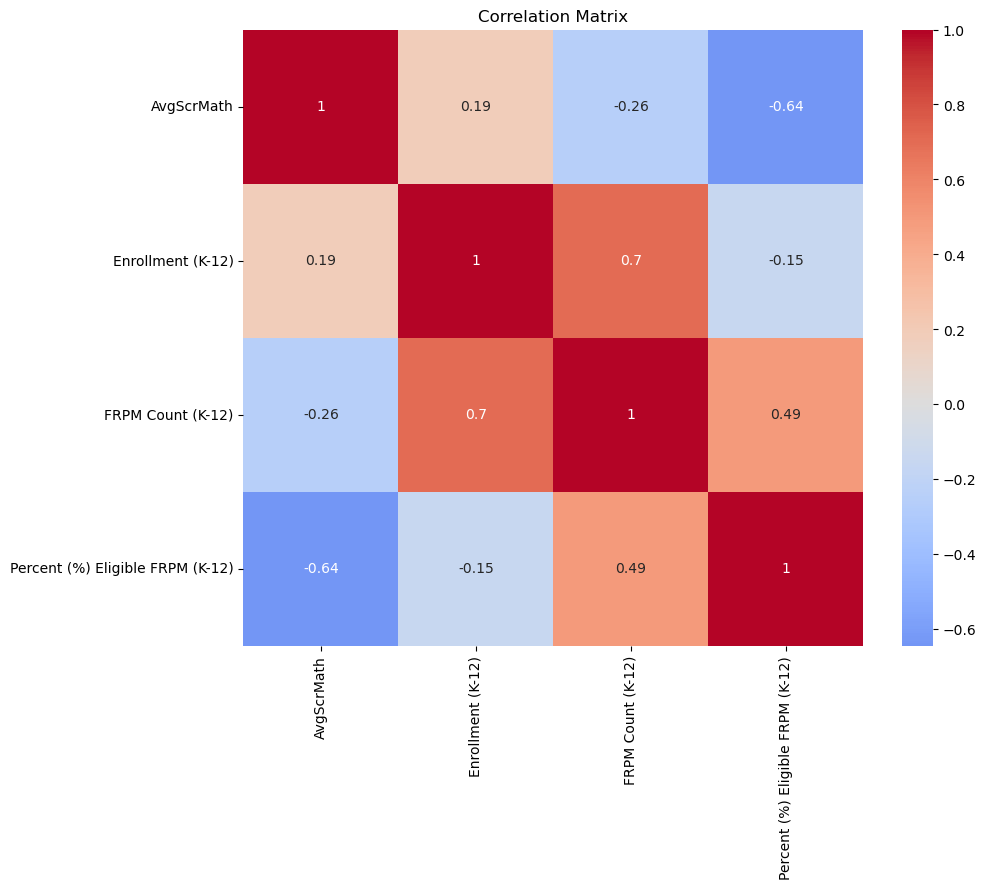

In [42]:
# Compute the correlation matrix
correlation_matrix = df[columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [43]:
import scipy.stats as stats

In [44]:
# Separate the data based on the 'Charter Funding Type'
directly_funded = df[df['FundingType'] == 'Directly funded']['AvgScrMath']
locally_funded = df[df['FundingType'] == 'Locally funded']['AvgScrMath']

F-Statistic: 11.563441599341191, P-Value: 0.000815026092172252


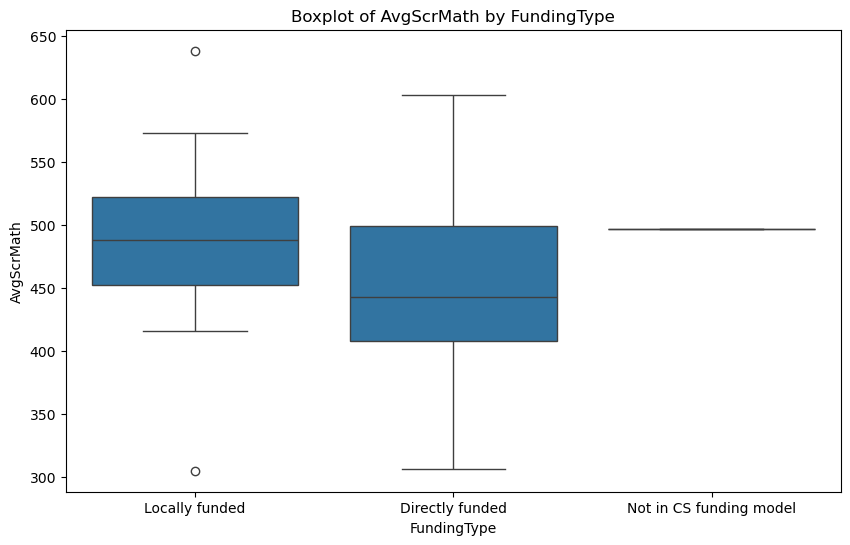

In [45]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(directly_funded, locally_funded)

print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")

# Visualize the data with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FundingType', y='AvgScrMath', data=df)
plt.title('Boxplot of AvgScrMath by FundingType')
plt.show()

In [46]:
# Separate the data based on the 'Charter Funding Type'
Traditional = df[df['EdOpsName'] == 'Traditional']['AvgScrMath']
Alternative = df[df['EdOpsName'] == 'Alternative School of Choice']['AvgScrMath']
Community = df[df['EdOpsName'] == 'County Community School']['AvgScrMath']

F-Statistic: 1.1231584378761734, P-Value: 0.3255321309630302


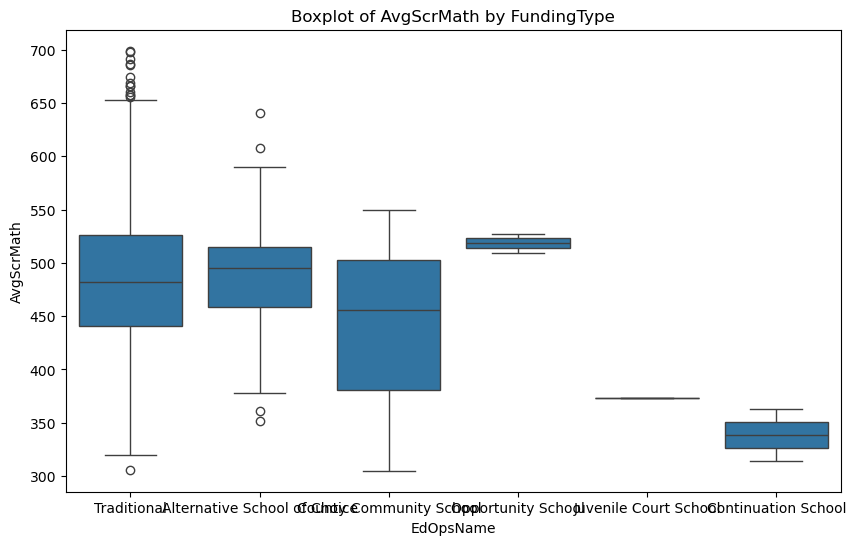

In [47]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(Traditional, Alternative, Community)

print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")

# Visualize the data with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='EdOpsName', y='AvgScrMath', data=df)
plt.title('Boxplot of AvgScrMath by FundingType')
plt.show()

In [48]:
# Separate the data based on the 'Charter Funding Type'
High = df[df['EILName'] == 'High School']['AvgScrMath']
Combination = df[df['EILName'] == 'Elementary-High Combination']['AvgScrMath']

F-Statistic: 10.528655116238701, P-Value: 0.0012018982925806419


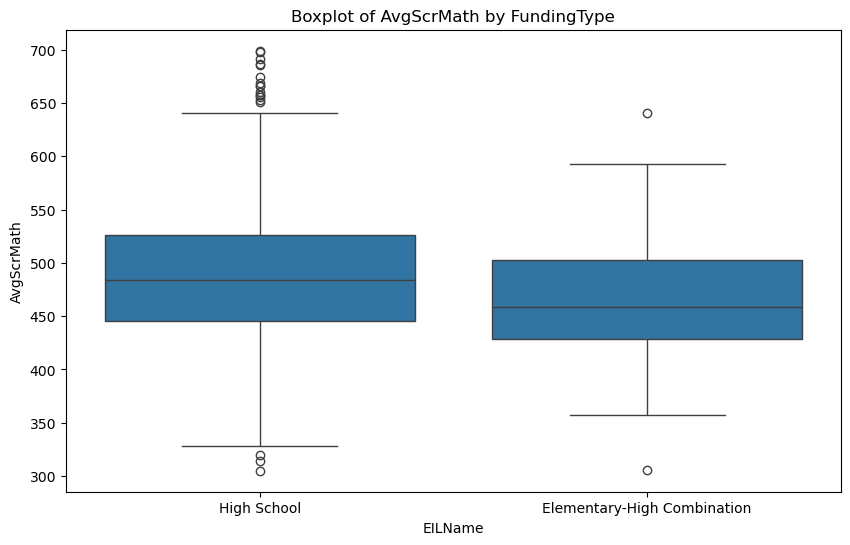

In [49]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(High, Combination)

print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")

# Visualize the data with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='EILName', y='AvgScrMath', data=df)
plt.title('Boxplot of AvgScrMath by FundingType')
plt.show()

### Q5: Which school types are the best at achieving good reading and writing scores for students on the FRPM program?

**When to Use One-Way ANOVA**

One-Way ANOVA is appropriate when:

You have one independent variable (factor) with multiple levels (groups).

The dependent variable (metric) is continuous.

The assumptions of ANOVA are met: normality of residuals, homogeneity of variances (equal variances across groups), and independence of observations.


**Assumptions of One-Way ANOVA**

Normality: The data within each group should be approximately normally distributed.

Homogeneity of Variances: The variance among groups should be roughly equal.

Independence: Observations should be independent of each other.


**Welch's ANOVA**
A robust alternative to ANOVA that does not require equal variances.

In [50]:
query = """
WITH

meals AS (
    SELECT
        --"Academic Year"
        "School Code"
        ,"School Name"
       --,"Charter Funding Type"
       --,"Low Grade"
       --,"High Grade"
       ,"Enrollment (K-12)"
       ,"FRPM Count (K-12)"
       ,"Percent (%) Eligible FRPM (K-12)"
       ,"FRPM Count (Ages 5-17)"
       ,"Percent (%) Eligible FRPM (Ages 5-17)"
    FROM
      frpm
    WHERE
      "Academic Year" IS NOT NULL
),

school AS (
  SELECT
     CDSCode
    ,School
    ,County
    ,District
    ,City
    ,Zip
    ,State
    ,FundingType
    ,SOCType
    ,EdOpsName
    ,EILName
  FROM
    schools
),

scores AS (
    SELECT
       cds
      ,rtype
      --,sname
      --,dname
      --,cname
      ,enroll12
      ,NumTstTakr
      ,AvgScrRead
      ,AvgScrMath
      ,AvgScrWrite
      ,NumGE1500
      ,PctGE1500
    FROM
      satscores
    WHERE
      cds in (
          SELECT
            DISTINCT CDSCode
          FROM
            schools
          WHERE
            OpenDate IS NOT NULL
             AND
            ClosedDate IS NULL
    )
)

SELECT
     meals.*
    ,school.*
    ,scores.*

FROM meals
INNER JOIN school
ON meals."School Name" = school."School"

LEFT JOIN scores
ON school.CDSCode = scores.cds

WHERE
  scores.cds IS NOT NULL
    AND
  "Percent (%) Eligible FRPM (K-12)" IS NOT NULL
    AND
  AvgScrRead IS NOT NULL
    AND
  AvgScrMath IS NOT NULL
     AND
  AvgScrWrite IS NOT NULL
"""
df = execute_query(db_path, query)

In [51]:
df

,School Code,School Name,Enrollment (K-12),FRPM Count (K-12),Percent (%) Eligible FRPM (K-12),FRPM Count (Ages 5-17),Percent (%) Eligible FRPM (Ages 5-17),CDSCode,School,County,District,City,Zip,State,FundingType,SOCType,EdOpsName,EILName,cds,rtype,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrite,NumGE1500,PctGE1500
0,0112607,Envision Academy for Arts & Technology,395.0,186.0,0.470886,182.0,0.484043,01100170112607,Envision Academy for Arts & Technology,Alameda,Alameda County Office of Education,Oakland,94612-3355,CA,Directly funded,High Schools (Public),Traditional,High School,01100170112607,S,75,71,397,387,395,5,7.04
1,0106401,Alameda Science and Technology Institute,170.0,52.0,0.305882,50.0,0.299401,01611190106401,Alameda Science and Technology Institute,Alameda,Alameda Unified,Alameda,94501-2109,CA,None,Alternative Schools of Choice,Alternative School of Choice,High School,01611190106401,S,36,36,562,590,555,29,80.56
2,0130229,Alameda High,1746.0,396.0,0.226804,378.0,0.225672,01611190130229,Alameda High,Alameda,Alameda Unified,Alameda,94501-4406,CA,None,High Schools (Public),Traditional,High School,01611190130229,S,465,325,543,573,543,229,70.46
3,0130609,Alameda Community Learning Center,376.0,47.0,0.125000,45.0,0.120321,01611190130609,Alameda Community Learning Center,Alameda,Alameda Unified,Alameda,94501-1851,CA,Directly funded,K-12 Schools (Public),Traditional,Elementary-High Combination,01611190130609,S,26,20,575,593,581,16,80.00
4,0130625,Alternatives in Action,161.0,148.0,0.919255,132.0,0.929577,01611190130625,Alternatives in Action,Alameda,Alameda Unified,Oakland,94621,CA,Directly funded,High Schools (Public),Traditional,High School,01611190130625,S,41,23,352,350,343,1,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,5738802,Woodland Senior High,1288.0,779.0,0.604814,754.0,0.604167,57727105738802,Woodland Senior High,Yolo,Woodland Joint Unified,Woodland,95695-2611,CA,None,High Schools (Public),Traditional,High School,57727105738802,S,277,118,477,469,468,44,37.29
1463,5830013,Lindhurst High,1117.0,986.0,0.882722,940.0,0.880150,58727365830013,Lindhurst High,Yuba,Marysville Joint Unified,Olivehurst,95961-4738,CA,None,High Schools (Public),Traditional,High School,58727365830013,S,221,65,428,450,423,13,20.00
1464,5830138,Marysville Charter Academy for the Arts,374.0,179.0,0.478610,179.0,0.479893,58727365830138,Marysville Charter Academy for the Arts,Yuba,Marysville Joint Unified,Marysville,95901-3731,CA,Locally funded,High Schools (Public),Traditional,High School,58727365830138,S,41,29,501,494,484,16,55.17
1465,5835202,Marysville High,896.0,575.0,0.641741,559.0,0.639588,58727365835202,Marysville High,Yuba,Marysville Joint Unified,Marysville,95901-3751,CA,None,High Schools (Public),Traditional,High School,58727365835202,S,197,53,489,513,487,24,45.28


In [52]:
number = 10

for column in df.columns:
    print("Column name:", column)
    print("Data type:", df[column].dtype)
    print(f"First {number} unique values:", df[column].unique()[:number])
    print("Count of unique values:", df[column].nunique())
    print("Count of NULL values:", df[column].isnull().sum(), "\n")

Column name: School Code
Data type: object
First 10 unique values: ['0112607' '0106401' '0130229' '0130609' '0130625' '0130450' '0122697'
 '0131177' '0132225' '0132746']
Count of unique values: 1243
Count of NULL values: 0 

Column name: School Name
Data type: object
First 10 unique values: ['Envision Academy for Arts & Technology'
 'Alameda Science and Technology Institute' 'Alameda High'
 'Alameda Community Learning Center' 'Alternatives in Action'
 'Albany High' 'REALM Charter High' 'Berkeley High' 'Castro Valley High'
 'Emery Secondary']
Count of unique values: 1137
Count of NULL values: 0 

Column name: Enrollment (K-12)
Data type: float64
First 10 unique values: [ 395.  170. 1746.  376.  161. 1195.  361. 3182. 2977.  191.]
Count of unique values: 1011
Count of NULL values: 0 

Column name: FRPM Count (K-12)
Data type: float64
First 10 unique values: [186.  52. 396.  47. 148. 232. 267. 934. 508. 130.]
Count of unique values: 896
Count of NULL values: 0 

Column name: Percent (%) E

●	Q5: Which school types are the best at achieving good reading and writing scores for students on the FRPM program?


Analyzing AvgScrRead by EILName...

Comparison between High School and Elementary-High Combination:
  T-Statistic: 0.22081170076091147, P-Value: 0.8256642651537385


/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


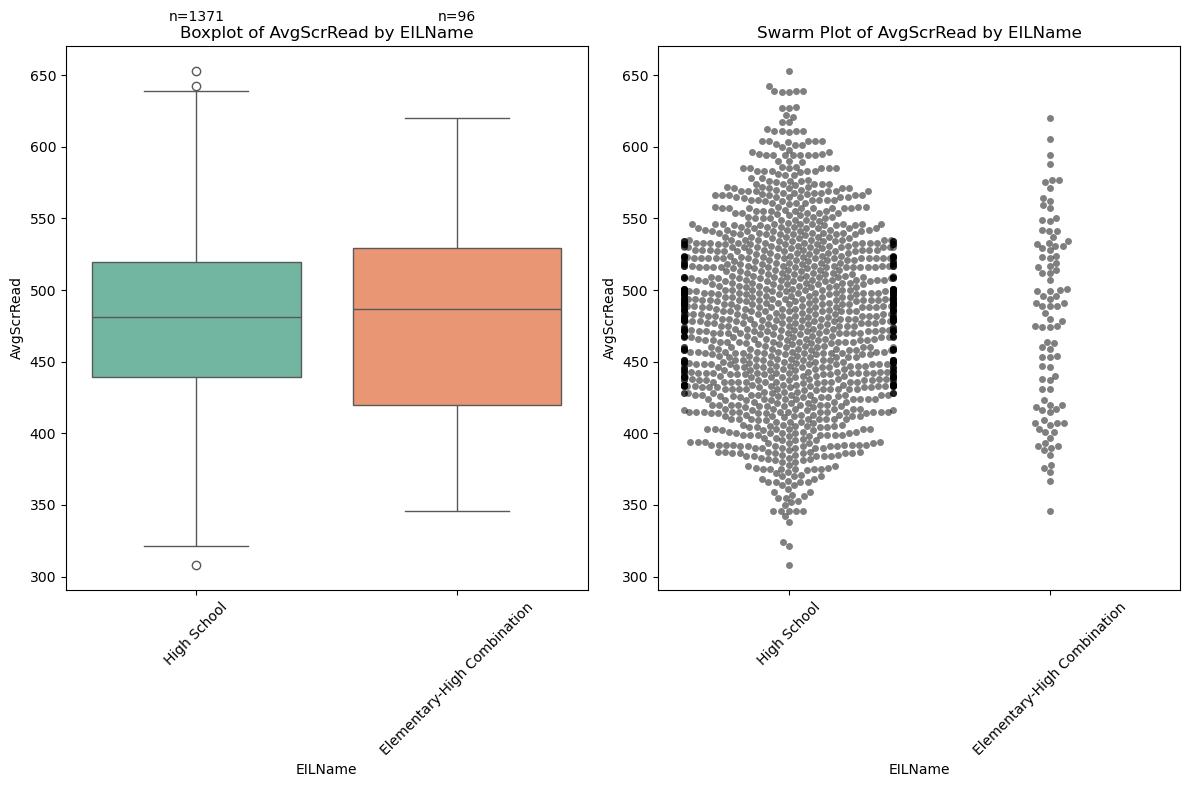


Analyzing AvgScrRead by FundingType...

Comparison between Directly funded and Locally funded:
  T-Statistic: -4.339973361490142, P-Value: 4.675725301264938e-05
Comparison between Directly funded and Not in CS funding model:
  T-Statistic: -6.408438275585954, P-Value: 1.6557754156568252e-09
Comparison between Locally funded and Not in CS funding model:
  T-Statistic: 1.2616712572657571, P-Value: 0.2143750689851553


/tmp/ipykernel_44422/1667906816.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.Categorical(df[column], categories=sorted_groups, ordered=True)
/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")


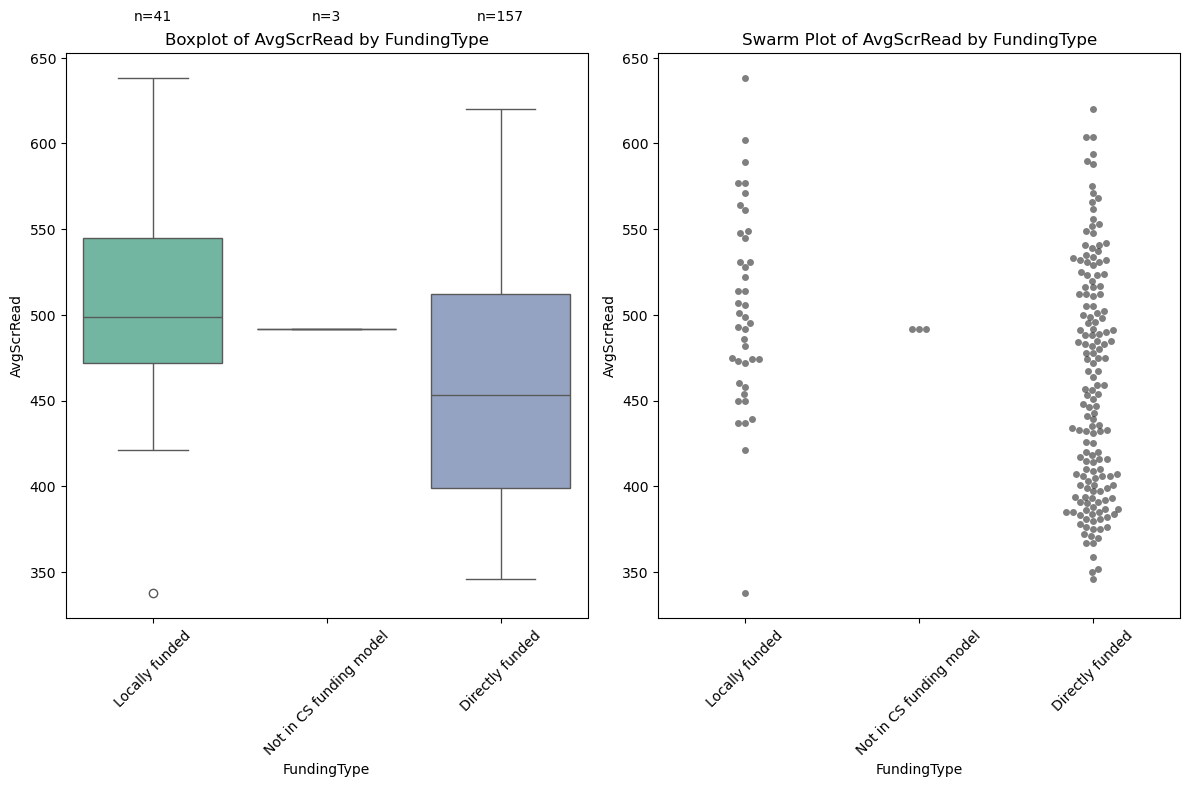


Analyzing AvgScrRead by EdOpsName...

Comparison between Traditional and Alternative School of Choice:
  T-Statistic: -2.8249812489439012, P-Value: 0.006192400267288035
Comparison between Traditional and County Community School:
  T-Statistic: 0.22146865986181427, P-Value: 0.8452643636850343
Comparison between Traditional and Opportunity School:
  T-Statistic: -3.342837672141204, P-Value: 0.0771981308860486
Comparison between Traditional and Continuation School:
  T-Statistic: 3.695545248774128, P-Value: 0.1673935390721058
Comparison between Traditional and Juvenile Court School:
  T-Statistic: nan, P-Value: nan
Comparison between Alternative School of Choice and County Community School:
  T-Statistic: 0.543665029369551, P-Value: 0.6399704542288933
Comparison between Alternative School of Choice and Opportunity School:
  T-Statistic: -1.8643272726929851, P-Value: 0.16210153797981355
Comparison between Alternative School of Choice and Continuation School:
  T-Statistic: 4.2476451199382

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 66.9% of the p

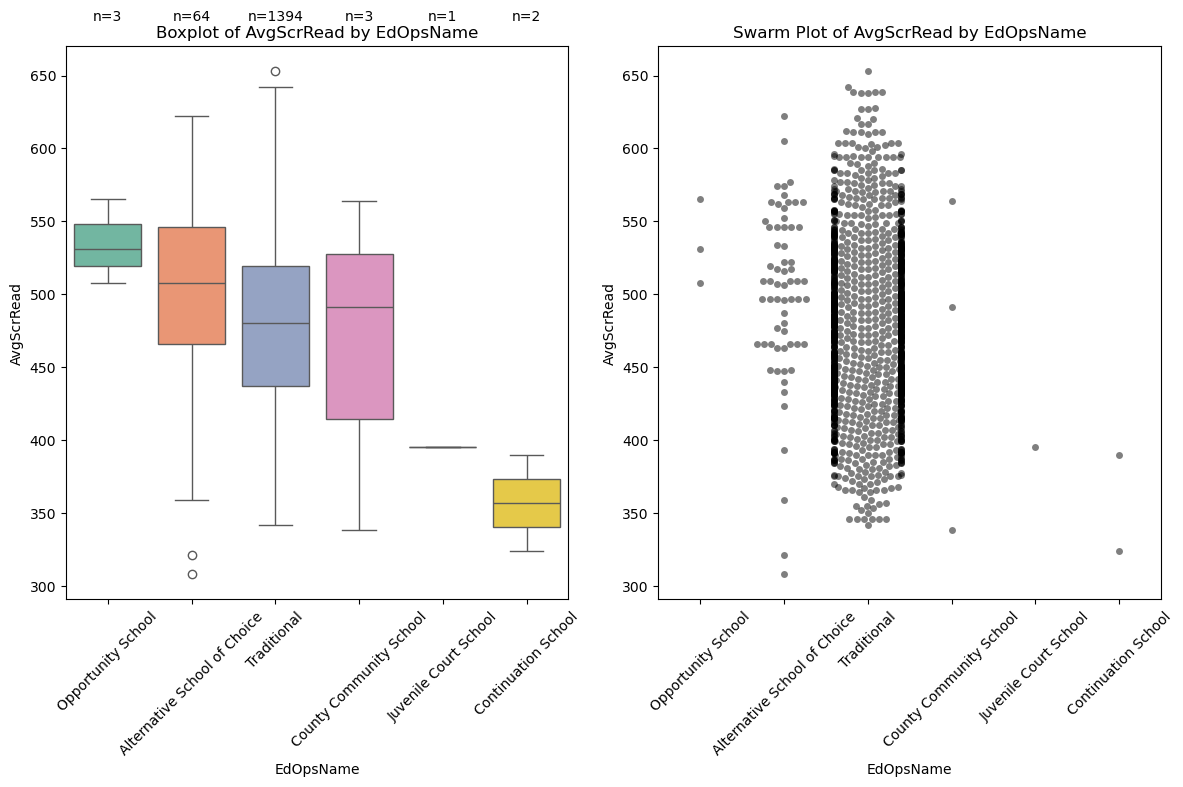


Analyzing AvgScrRead by SOCType...

Comparison between High Schools (Public) and Alternative Schools of Choice:
  T-Statistic: -2.7661664574233353, P-Value: 0.007282092275352424
Comparison between High Schools (Public) and K-12 Schools (Public):
  T-Statistic: 0.891463736486997, P-Value: 0.3749301578409385
Comparison between High Schools (Public) and County Community:
  T-Statistic: 0.22794272629046647, P-Value: 0.8408530391656356
Comparison between High Schools (Public) and Opportunity Schools:
  T-Statistic: nan, P-Value: nan
Comparison between High Schools (Public) and Continuation High Schools:
  T-Statistic: 3.7084156145318783, P-Value: 0.16679718476052335
Comparison between High Schools (Public) and Juvenile Court Schools:
  T-Statistic: nan, P-Value: nan
Comparison between High Schools (Public) and High Schools In 1 School Dist. (Public):
  T-Statistic: nan, P-Value: nan
Comparison between Alternative Schools of Choice and K-12 Schools (Public):
  T-Statistic: 2.700101552749246

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 74.4% of the p

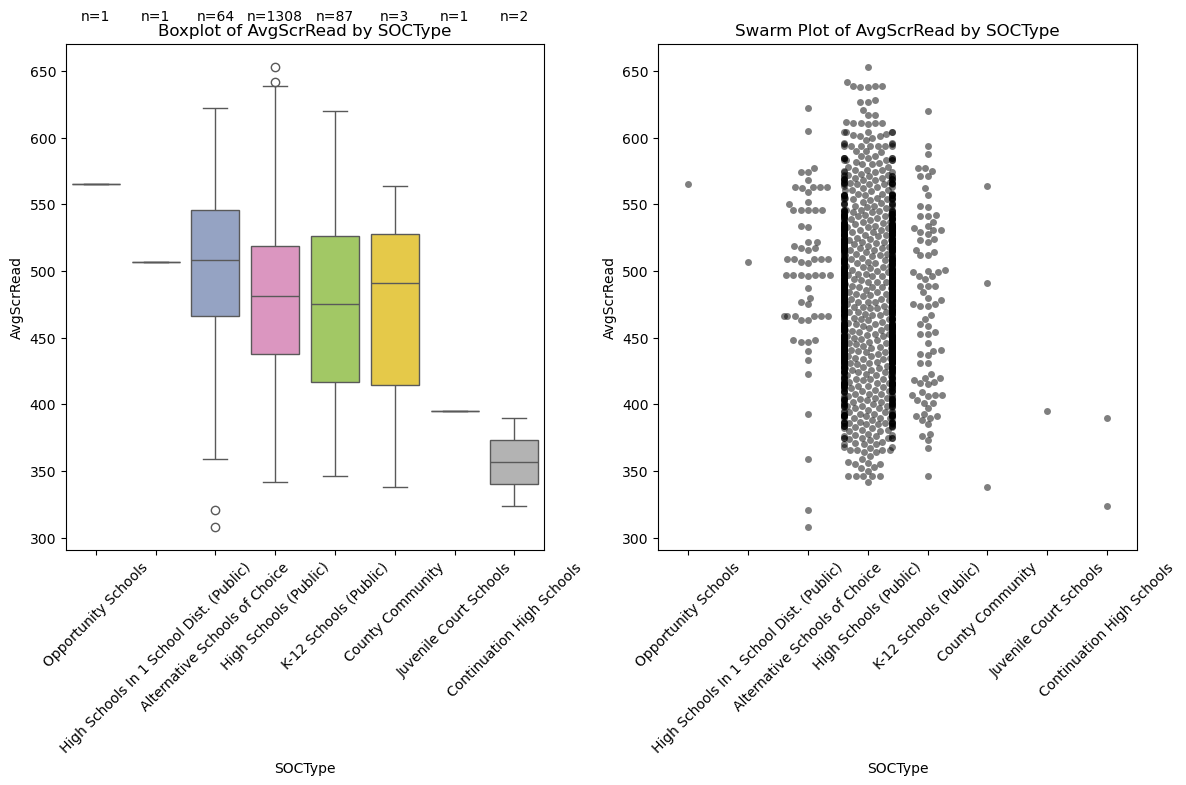


Analyzing AvgScrWrite by EILName...

Comparison between High School and Elementary-High Combination:
  T-Statistic: 0.924705291823916, P-Value: 0.35715940522487855


/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


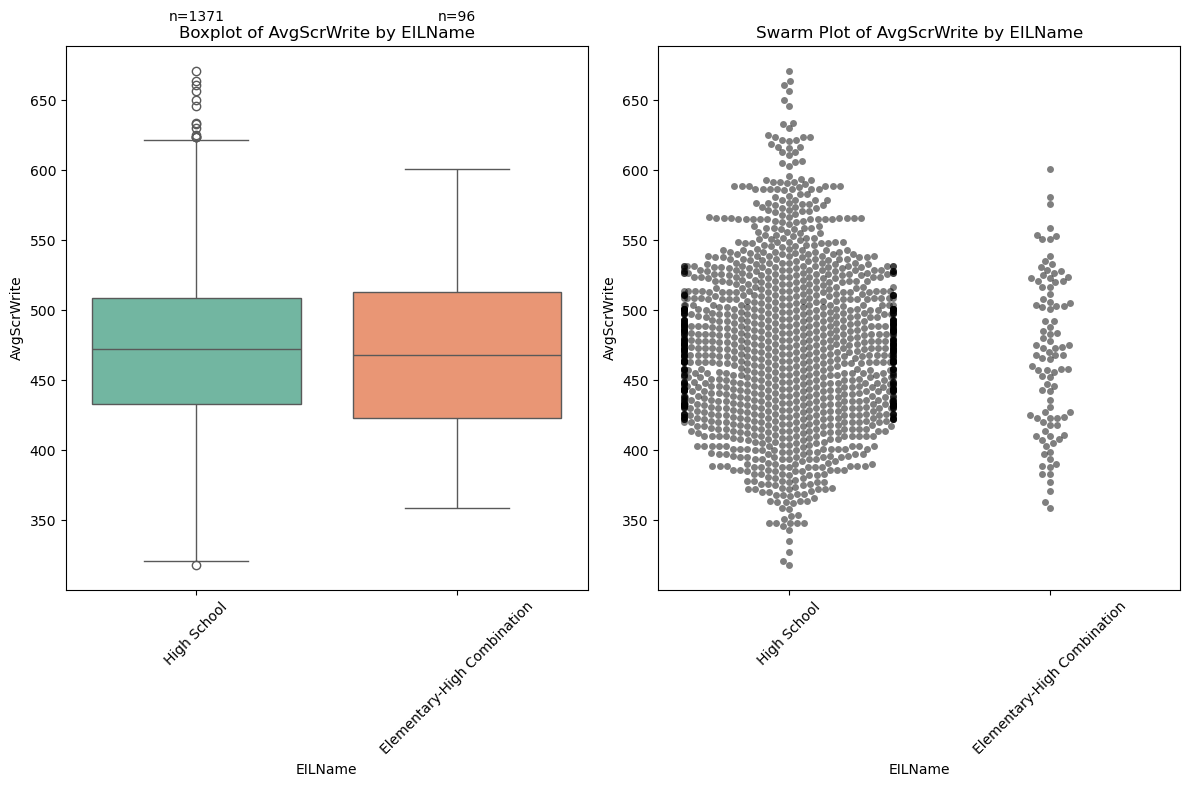


Analyzing AvgScrWrite by FundingType...

Comparison between Directly funded and Locally funded:
  T-Statistic: -3.8119571177070584, P-Value: 0.00029321280974662413
Comparison between Directly funded and Not in CS funding model:
  T-Statistic: -5.099610642550342, P-Value: 9.750882688923803e-07
Comparison between Locally funded and Not in CS funding model:
  T-Statistic: 1.428445177442042, P-Value: 0.1609261934232466


/tmp/ipykernel_44422/1667906816.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.Categorical(df[column], categories=sorted_groups, ordered=True)
/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")


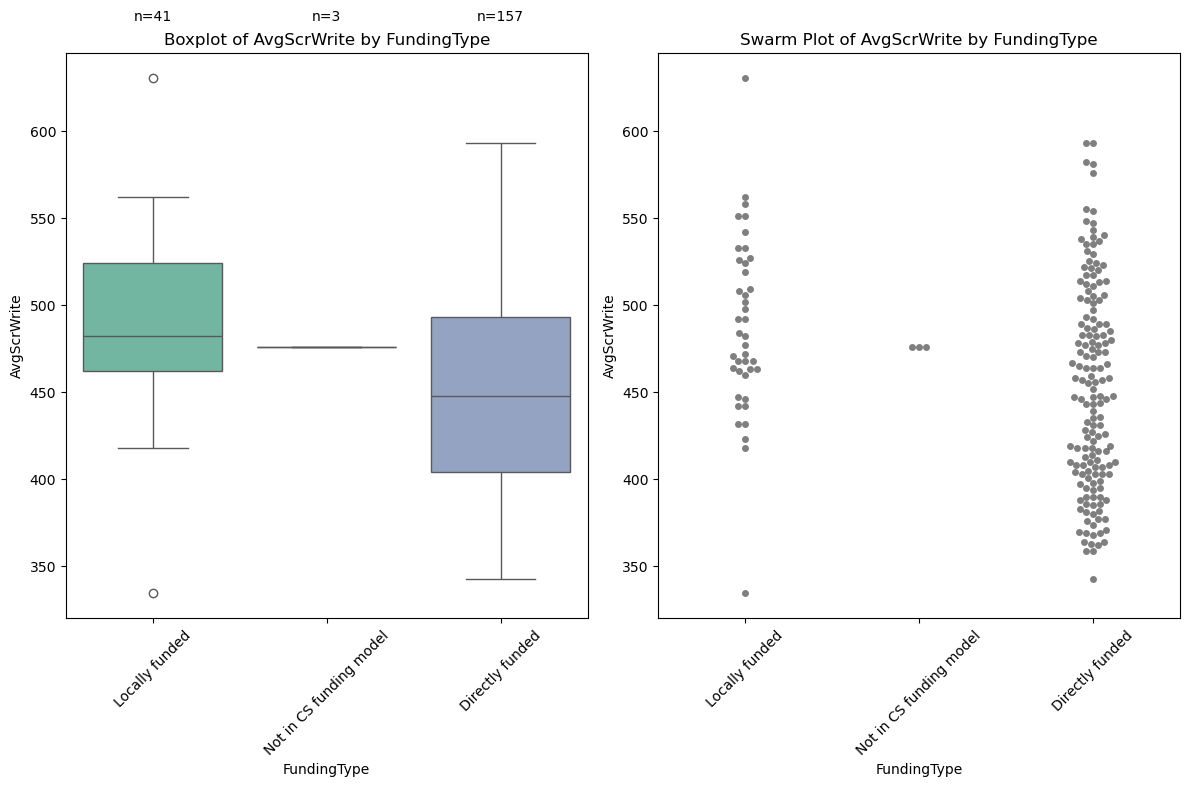


Analyzing AvgScrWrite by EdOpsName...

Comparison between Traditional and Alternative School of Choice:
  T-Statistic: -2.370541235442786, P-Value: 0.02052202638542587
Comparison between Traditional and County Community School:
  T-Statistic: 0.5789420510951797, P-Value: 0.6210698398142052
Comparison between Traditional and Opportunity School:
  T-Statistic: -2.688211228490816, P-Value: 0.11385073759455792
Comparison between Traditional and Continuation School:
  T-Statistic: 2.985050431959935, P-Value: 0.20516503971252784
Comparison between Traditional and Juvenile Court School:
  T-Statistic: nan, P-Value: nan
Comparison between Alternative School of Choice and County Community School:
  T-Statistic: 0.8533786333519363, P-Value: 0.4813293729294035
Comparison between Alternative School of Choice and Opportunity School:
  T-Statistic: -1.8887048747675002, P-Value: 0.17933913461580261
Comparison between Alternative School of Choice and Continuation School:
  T-Statistic: 3.352839840046

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 67.0% of the p

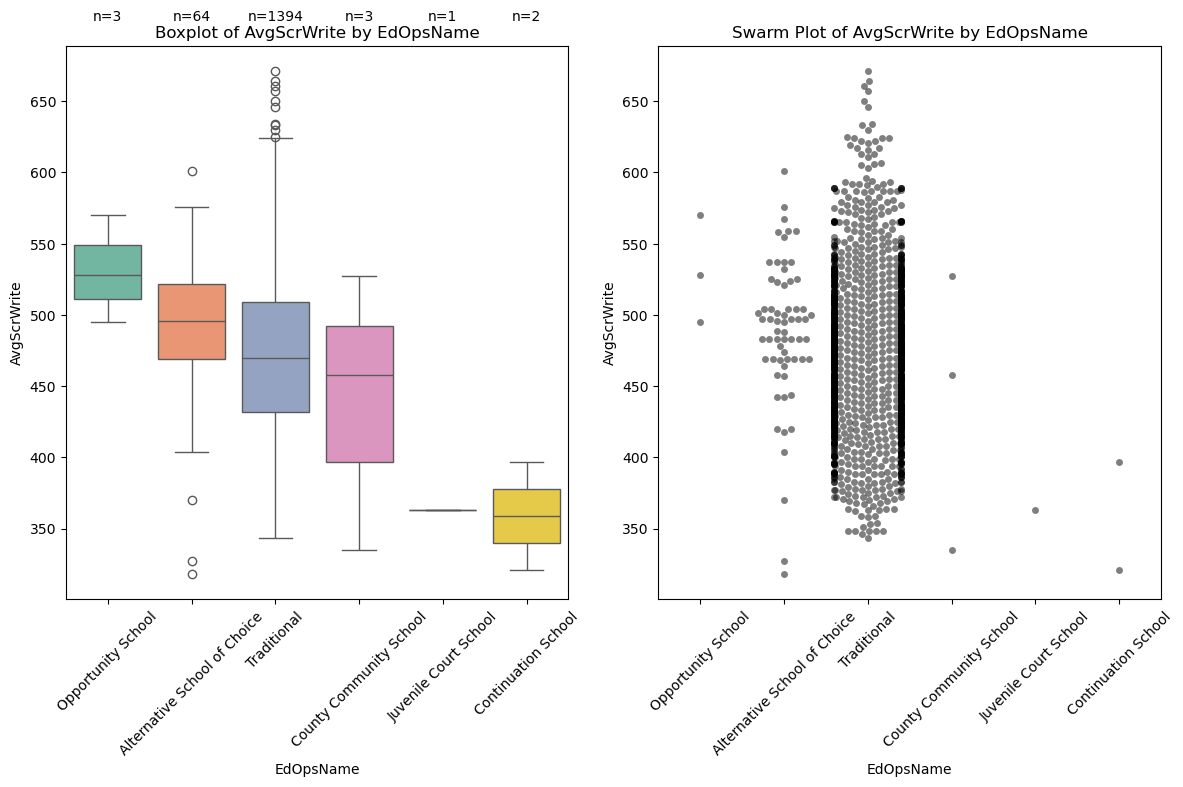


Analyzing AvgScrWrite by SOCType...

Comparison between High Schools (Public) and Alternative Schools of Choice:
  T-Statistic: -2.2660630366046575, P-Value: 0.026521984693088193
Comparison between High Schools (Public) and K-12 Schools (Public):
  T-Statistic: 1.6473283577432476, P-Value: 0.10267788620541154
Comparison between High Schools (Public) and County Community:
  T-Statistic: 0.5907924173643069, P-Value: 0.6144506808079699
Comparison between High Schools (Public) and Opportunity Schools:
  T-Statistic: nan, P-Value: nan
Comparison between High Schools (Public) and Continuation High Schools:
  T-Statistic: 3.002416385386897, P-Value: 0.20401310909398085
Comparison between High Schools (Public) and Juvenile Court Schools:
  T-Statistic: nan, P-Value: nan
Comparison between High Schools (Public) and High Schools In 1 School Dist. (Public):
  T-Statistic: nan, P-Value: nan
Comparison between Alternative Schools of Choice and K-12 Schools (Public):
  T-Statistic: 2.87141434215942

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 6.2% of the po

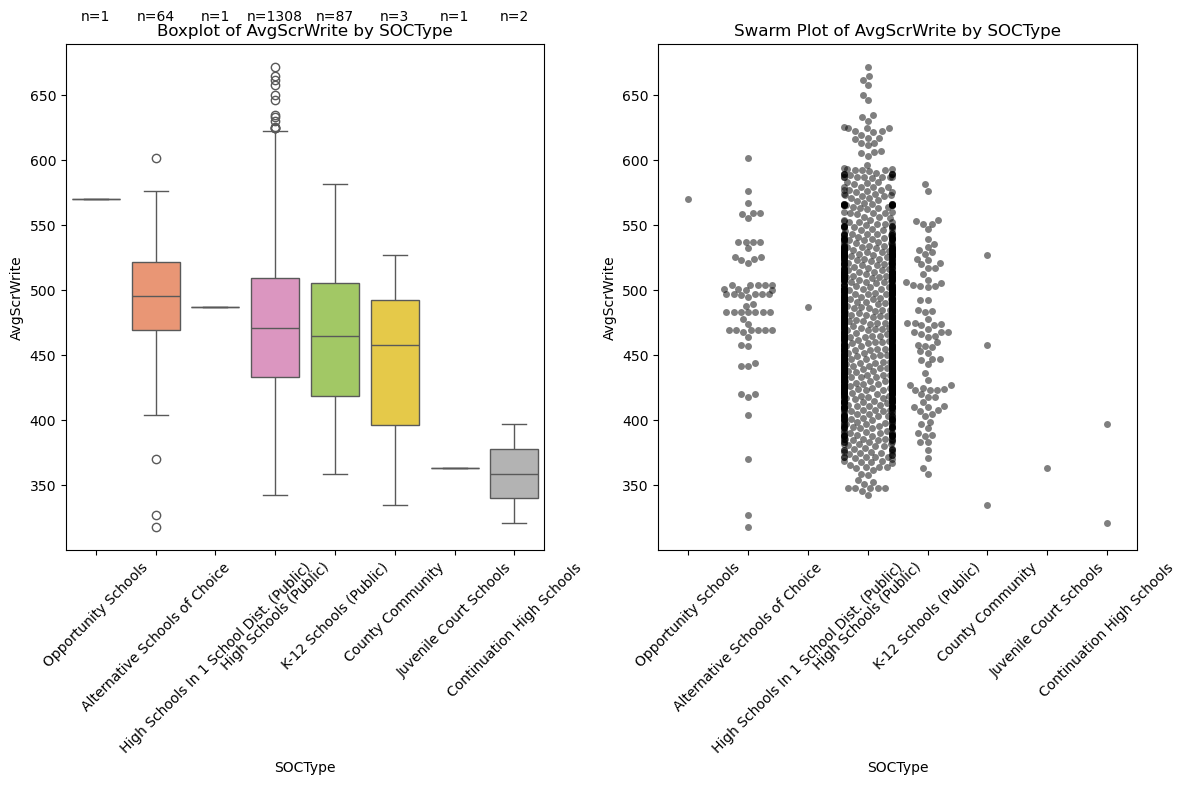


Analyzing AvgScrMath by EILName...

Comparison between High School and Elementary-High Combination:
  T-Statistic: 3.440223032934592, P-Value: 0.0008204316698233793


/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


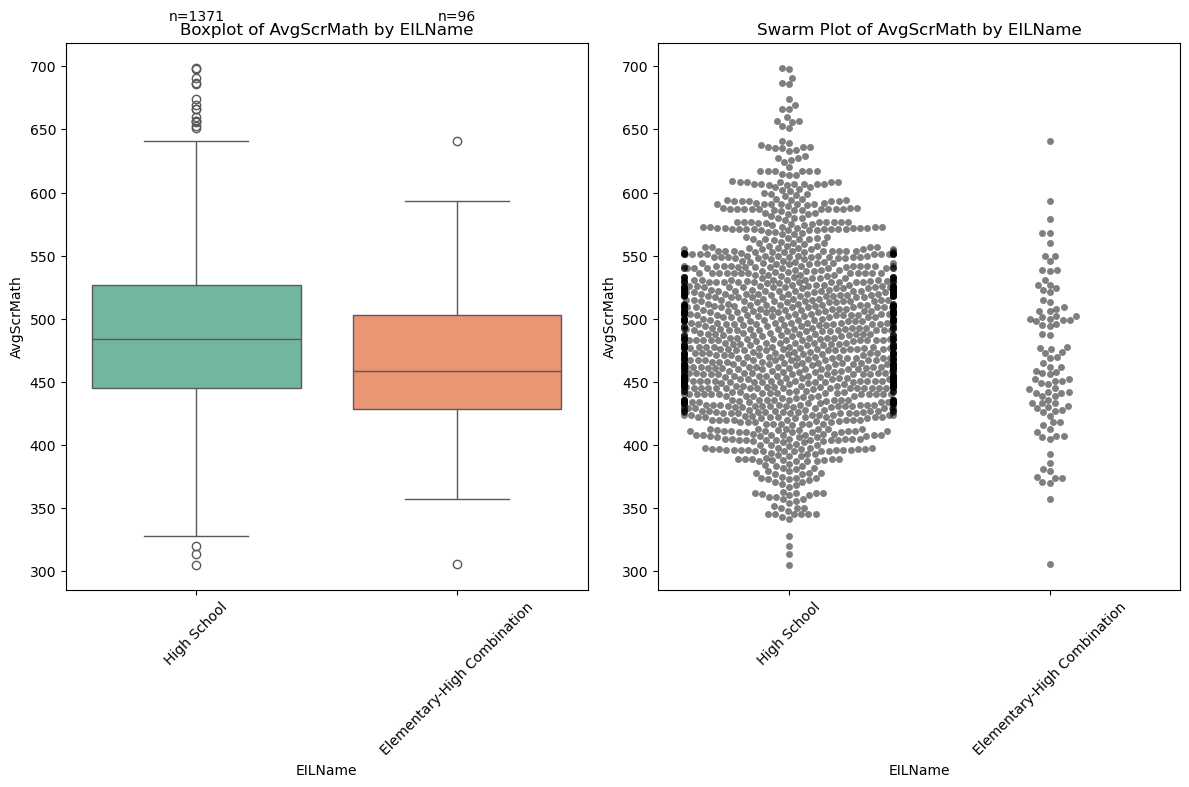


Analyzing AvgScrMath by FundingType...

Comparison between Directly funded and Locally funded:
  T-Statistic: -3.5648264842047883, P-Value: 0.0006788714664984923
Comparison between Directly funded and Not in CS funding model:
  T-Statistic: -9.098655679136268, P-Value: 4.0622486019222113e-16
Comparison between Locally funded and Not in CS funding model:
  T-Statistic: -0.9633988087728276, P-Value: 0.34113578813131706


/tmp/ipykernel_44422/1667906816.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.Categorical(df[column], categories=sorted_groups, ordered=True)
/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")


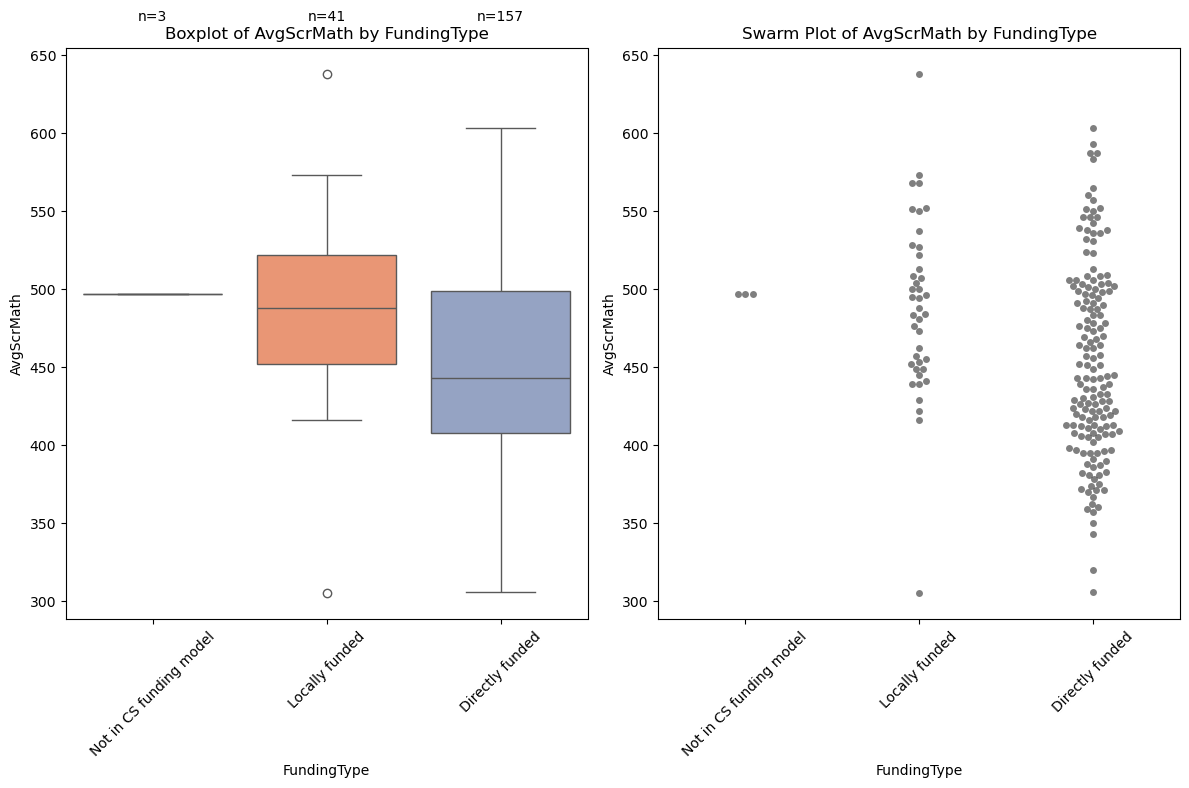


Analyzing AvgScrMath by EdOpsName...

Comparison between Traditional and Alternative School of Choice:
  T-Statistic: -0.7584222032617446, P-Value: 0.45068188248672525
Comparison between Traditional and County Community School:
  T-Statistic: 0.6840406710794558, P-Value: 0.564502815040574
Comparison between Traditional and Opportunity School:
  T-Statistic: -5.940407464186328, P-Value: 0.016671130770564667
Comparison between Traditional and Continuation School:
  T-Statistic: 5.999214891888112, P-Value: 0.10355619778736899
Comparison between Traditional and Juvenile Court School:
  T-Statistic: nan, P-Value: nan
Comparison between Alternative School of Choice and County Community School:
  T-Statistic: 0.7523091818807353, P-Value: 0.52924133119747
Comparison between Alternative School of Choice and Opportunity School:
  T-Statistic: -3.2987665710736116, P-Value: 0.006301804769983899
Comparison between Alternative School of Choice and Continuation School:
  T-Statistic: 6.0137434679986

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 67.1% of the p

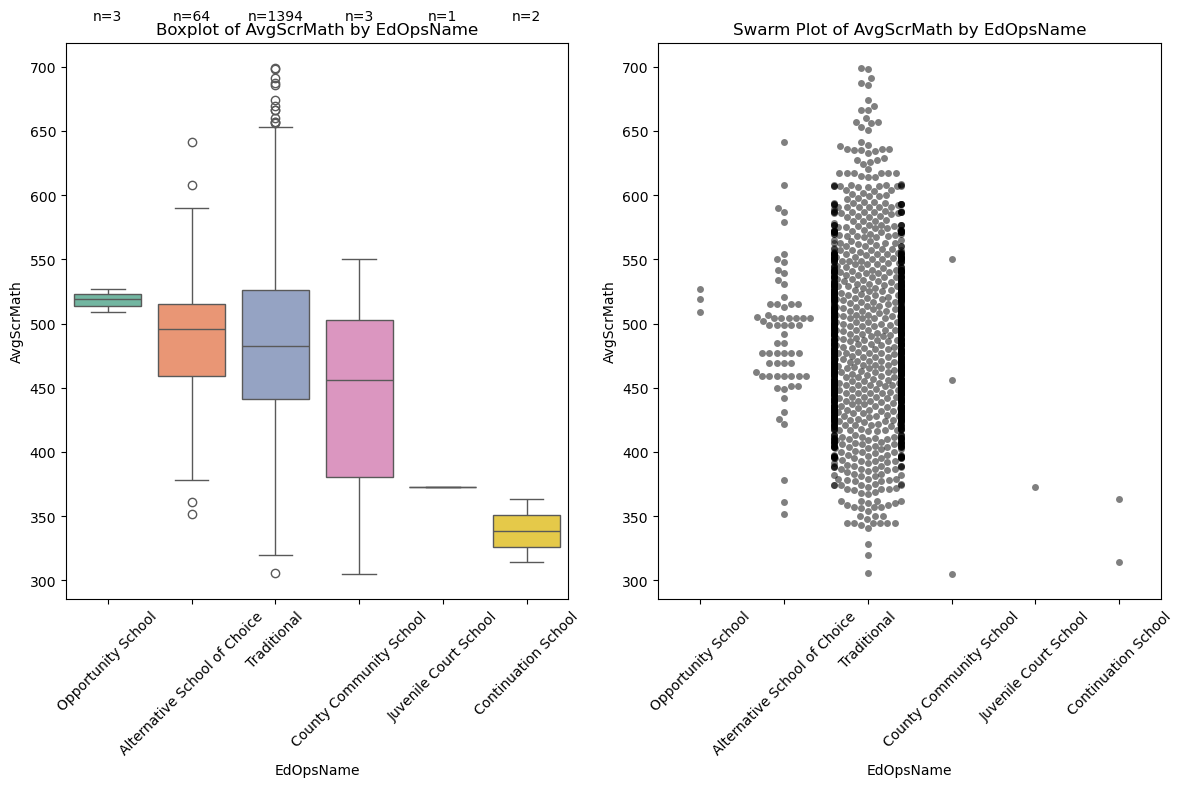


Analyzing AvgScrMath by SOCType...

Comparison between High Schools (Public) and Alternative Schools of Choice:
  T-Statistic: -0.4883999261786079, P-Value: 0.6267430708738205
Comparison between High Schools (Public) and K-12 Schools (Public):
  T-Statistic: 4.545807079147621, P-Value: 1.5197985002295015e-05
Comparison between High Schools (Public) and County Community:
  T-Statistic: 0.7092628271809049, P-Value: 0.5516205673207941
Comparison between High Schools (Public) and Opportunity Schools:
  T-Statistic: nan, P-Value: nan
Comparison between High Schools (Public) and Continuation High Schools:
  T-Statistic: 6.071597079918828, P-Value: 0.10222548240135054
Comparison between High Schools (Public) and Juvenile Court Schools:
  T-Statistic: nan, P-Value: nan
Comparison between High Schools (Public) and High Schools In 1 School Dist. (Public):
  T-Statistic: nan, P-Value: nan
Comparison between Alternative Schools of Choice and K-12 Schools (Public):
  T-Statistic: 3.578670672119484

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_44422/1667906816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 9.4% of the po

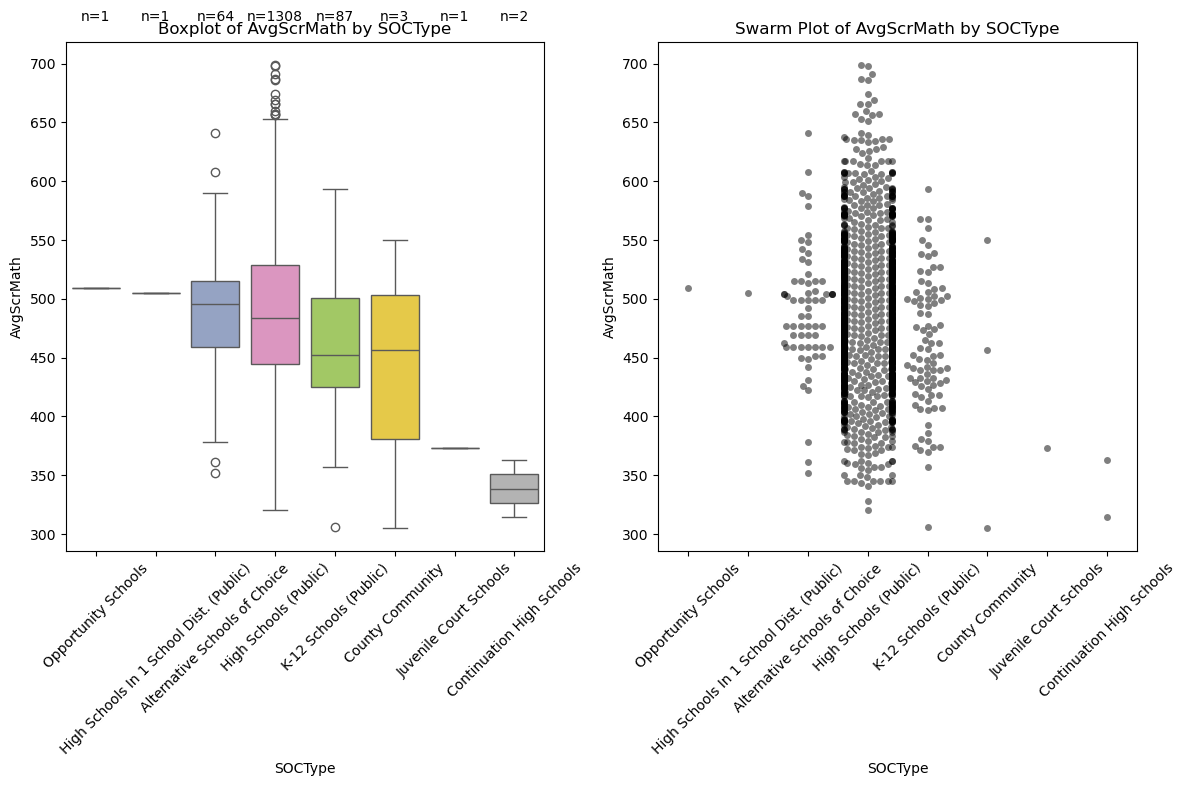

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Sample DataFrame setup (replace with your actual data)
# df = pd.read_csv('your_data.csv')  # Load your actual data here

def perform_welchs_anova(df, metric, column):
    # Ensure there are no missing values in the column and the metric
    df = df.dropna(subset=[column, metric])
    
    # Check for empty groups after dropping NaN
    if df[column].nunique() < 2:
        print(f"Not enough unique categories in {column} to perform ANOVA.")
        return
    
    # Dictionary to store the separated data
    grouped_data = {name: df[df[column] == name][metric] for name in df[column].unique()}
    
    # Calculate the mean for each group
    group_means = {name: values.mean() for name, values in grouped_data.items()}
    
    # Sort the groups by their mean in descending order
    sorted_groups = sorted(group_means, key=group_means.get, reverse=True)
    
    # Reorder the DataFrame based on the sorted groups
    df[column] = pd.Categorical(df[column], categories=sorted_groups, ordered=True)
    df = df.sort_values(column)
    
    # Perform pairwise t-tests with unequal variance
    def pairwise_t_tests(groups):
        keys = list(groups.keys())
        results = {}
        for i in range(len(keys)):
            for j in range(i+1, len(keys)):
                group1 = groups[keys[i]]
                group2 = groups[keys[j]]
                t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
                results[(keys[i], keys[j])] = (t_stat, p_value)
        return results

    # Perform pairwise t-tests
    test_results = pairwise_t_tests(grouped_data)
    
    # Print results
    for (group1, group2), (t_stat, p_value) in test_results.items():
        print(f"Comparison between {group1} and {group2}:")
        print(f"  T-Statistic: {t_stat}, P-Value: {p_value}")

    # Visualize the data with a boxplot and a swarm plot
    plt.figure(figsize=(12, 8))

    # Boxplot
    plt.subplot(1, 2, 1)
    boxplot = sns.boxplot(x=column, y=metric, data=df, palette="Set2")
    plt.title(f'Boxplot of {metric} by {column}')
    plt.xticks(rotation=45)
    
    # Add frequency counts on the boxplot
    counts = df.groupby(column).size()
    for i, label in enumerate(boxplot.get_xticklabels()):
        count = counts[label.get_text()]
        boxplot.text(i, df[metric].max() * 1.05, f'n={count}', ha='center', va='bottom', fontsize=10, color='black')

    # Swarm plot
    plt.subplot(1, 2, 2)
    sns.swarmplot(x=column, y=metric, data=df, color='k', alpha=0.5)
    plt.title(f'Swarm Plot of {metric} by {column}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Loop over metrics and columns
for metric in ["AvgScrRead", "AvgScrWrite", "AvgScrMath"]:
    for column in [
        "EILName",  # 2 groups
        "FundingType",  # 3 groups
        "EdOpsName",  # 6 groups
        "SOCType",  # 8 groups
        # "County",  # too many groups
        # "District",  # too many groups
    ]:
        print(f"\nAnalyzing {metric} by {column}...\n")
        perform_welchs_anova(df, metric, column)
